# Devoir Maison 2024

*Note:* 

Vous devez rendre le notebook python généré par ce document le 10 mai prochain à 22:00 au plus tard.
Le notebook est dans l&#8217;archive à télécherger et se nomme tan2-dm-2024.ipynb, il se trouve dans le dossier de l&#8217;archive
```sh
notebooks/annales/2023-2024/tan2-dm-2024.ipynb
```
L&#8217;emplacement pour les réponses est indiqué par la balise `# votre code` dans les cellules de code.
Vous rajouterez une cellule de texte markdown afin de commenter chaque réponse.
Vous devrez un fichier notebook nommé de la manière suivante:
```sh
tan2-dm-2024-<votre prenom>-<votre nom>-<votre section>.ipynb
```
où vous remplacez

- `&lt;votre prenom&gt;` par votre prenom en minuscule
- `&lt;votre nom&gt;` par votre nom en minuscule
- `&lt;votre section&gt;` par votre section: `l3capes`, `l3ma` ou `l3sante`

Le fichier est à déposer sur Moodle dans la section dédiée.
Vous deposerez votre travail sur [Moodle](https://moodle.unistra.fr/mod/assign/view.php?id=1076698), le code d&#8217;inscription est `tan`


*Note:* 

Concernant l&#8217;utilisation des notebooks, vous pourrez vous appuyer sur cette vidéo
## Points stationnaires d&#8217;une population d&#8217;insectes


![image](dm/insecte.png)

La dynamique des populations peut être décrite par des équations aux différences. La connaissance des points stationnaires de ces équations est fundamental pour comprendre comment la population va evoluer. Dans ce travail on va considerer un modèle discret pour une population d&#8217;insectes afin de calculer et classifier ces points stationnaires.
## Introduction et notations

On considère une population d&#8217;insectes qui est décrite par une relation récursive :

$$
N_{t+1}=f\left(N_t\right)
$$
où $N_t$ est le nombre d&#8217;insectes au temps $t$. Si on a $N_0$, on pourra calculer $N_1$, $N_2$, etc. Une façon de contrôler la population d&#8217;insectes du système c&#8217;est d&#8217;introduire et maintenir un nombre $S$ d&#8217;insectes stériles. Le modèle suivant a été proposé pour simuler la dynamique d&#8217;un tel système :

$$
N_{t+1}=\frac{R N_t^2}{\frac{R-1}{M} N_t^2+N_t+S}
$$
où $R>1, M>0$.
Dans ce travail, on va considérer $R=4$ et $M=15$ pour simplifier les équations à résoudre, mais la même étude peut être faite pour comptabiliser la dépendance de $R$ et $M$.
## Questions

* **Question a**\
Un point stationnaire de cette équation est une valeur $N^*$ telle que :

$$
N^*=f\left(N^*\right).
$$
Quelle est la signification de $N^*$ relativement au problème donné ?


In [1]:
# votre code
# Comme Nt représente le nombre d'insectes au temps t et N*=f(N*). Donc N* est un point fixe pour f, alors ce nombre représente
# la valeur maximale que peut atteindre cette population. C'est à dire il existe un temps t telque le nombre d'insecte deviebt fixe
# et est égale à N*.

3


* **Question b**\
Tracer le graphe de la fonction $f$ associée à l&#8217;équation pour $S=0.5, 10, 20$ et identifier graphiquement les points stationnaires de cette équation.


In [75]:
# votre code
import numpy as np
import plotly.graph_objs as go
R = 4
M = 15
def f(x,S):
    return R*(x**2)/((R-1)*(x**2)/M + x + S)

x = np.linspace(0, 20, 2000)
S = [0.5,10,20]
y = [0, 0, 0]
for i in range(0,3):
    y[i] = f(x, S[i])


# Create the plot
fig = go.Figure()

# Add traces for phi2, phi3, and y=x
fig.add_trace(go.Scatter(x=x, y=y[0], mode='lines', name='f pour S = 0.5', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=x, y=y[1], mode='lines', name='f pour S = 10', line=dict(color='red')))
fig.add_trace(go.Scatter(x=x, y=y[2], mode='lines', name='f pour S = 20', line=dict(color='yellow')))
fig.add_trace(go.Scatter(x=x, y=x, mode='lines', name='y=x', line=dict(color='green')))

fig.show()

### On voit graphiquement que :
# pour s=0,5 f admet deux points fixes: 0 et 15
# pour s=10 f admet comme point fixes: 0, 5 et 10
# pour s=20 f admet seulement 0 comme point fixe


* **Question c**\
Comme vous avez noté, le nombre de points stationnaires de l&#8217;équation varie avec $S$ (dans le cas général, il varie avec $R$ et $M$ aussi). Quelle est la valeur de $S$ pour laquelle le comportement (relatif au nombre de points stationnaires) change ? Déterminer le nombre de points stationnaires en fonction de $S$ en utilisant $S \in[0,20$].


In [60]:
# votre code
import numpy as np
def fixpoint(phi,s, x0, tol, nmax, *args):
    x = x0
    phix = phi(x,s, *args)
    niter = 0
    sol = []
    diff = tol + 1
    while niter < nmax:
        niter += 1
        diff = abs(phix - x)
        x = phix
        phix = phi(x,s, *args)
        if(tol>diff):
            sol.append(x) 
            x  = x + 1
    return sol
R = 4
M = 15
def f(x,S):
    return R*(x**2)/((R-1)*(x**2)/M + x + S)
S = np.linspace(0,20,100)
n_point = []
for i in S:
    sol = []
    sol = fixpoint(f,i, 0.5, 1.e-6, 1000)
    n_point.append(len(sol))
n_point[1]

493

* **Question d**\
Pour $S=10$, déterminer les points stationnaires de l&#8217;équation en utilisant des méthodes itératives convenables pour résoudre cette équation.


In [ ]:
# votre code


* **Question e**\
Soit $\lambda=f^{\prime}\left(N^*\right)$ où $N^*$ est un point stationnaire. On dit que $N^*$ est :


Classifier les points qu&#8217;on a trouvé au point précédent


In [ ]:
# votre code


* **Question f**\
Tracer le graphe de l&#8217;évolution de la population d&#8217;insectes pour $S=10$ et $N_0=2, 2.8, 7$ et $10$.


In [ ]:
# votre code


* **Question g**\
Si maintenant on suppose que le nombre d&#8217;insectes stériles change avec la loi :

$$
S_{t+1}=50 e^{S_t-N_t}
$$
on aura les équations suivantes pour simuler la dynamique du système :

$$
\left\{
\begin{aligned}
N_{t+1} & =\frac{R N_t^2}{\frac{R-1}{M} N_t^2+N_t+S_t} \\
S_{t+1} & =20 e^{S_t-N_t}
\end{aligned}
\right.
$$
En utilisant la méthode du point fixe, trouver un point fixe du problème [[eq:5]](#eq:5) avec l&#8217;itération initiale $x_0=[50,20]^T$. Calculer les valeurs propres du Jacobien dans le point que vous avez trouvé.


In [ ]:
# votre code


## Réactions chimiques et diffusion


![image](dm/papillon.png)

La distributions des espèces chimiques qui sont responsables de la formation de dessins sur les ailes des papillons (comme le Papilio Dardanus en figure) est déterminée par des réactions chimiques ainsi que par des processus de diffusion. Le but de ce projet est de analyser le comportement des concentrations des réactifs lorsque les deux phénomènes ont lieu en même temps, en considérant une géométrie élémentaire (un anneau).
Pour en savoir plus, voir cette publication [&gt; PDF](attachment$papillon.pdf).
## Introduction et notations

On considère des réactions chimiques qui ont lieu dans un anneau, représenté par un cercle de rayon unitaire. On considère `n` sites sur le cercle, distribués de façon uniforme (c.-à.-d. tels que la distance entre deux sites consécutifs soit $\delta=\frac{2 \pi}{n}$) dans le sens anti-horaire, comme en figure 1.
Soit `A` un réactif quelconque : on notera par $A_i(t)$ sa concentration (par unité de longueur) au `i`-ème site ($i=1,2, \ldots, n$) et au temps $t (t \geq 0)$: on assume également que les sites soient ordonnés dans le sens horaire.
Considérer le cas d&#8217;un seul réactif `A`, qui varie selon la loi suivante : pour $i=1,2, \ldots, n$, on a

$$
\frac{d}{dt} A_i(t)=q_{\text{react}}+q_{\text{diff}}, \quad i=1,2, \ldots, n,
$$
où

$$
q_{\text{react}}=-\lambda A_i(t)
$$
est la variation de concentration due à une réaction chimique du type $A \rightarrow B$, $\lambda$ étant un coefficient positif, et

$$
q_{\text{diff}}=-\frac{D}{\delta^2}\left(A_i(t)-A_{i_{-}}(t)\right)-\frac{D}{\delta^2}\left(A_i(t)-A_{i_{+}}(t)\right)
$$
est la variation de concentration due à la diffusion de `A` du `i`-ème site aux sites voisins `i_{-}` et `i_{+}` ($D>0$ étant le coefficient de diffusion), où :

$$
i_{-}=\left\{\begin{array}{ll}
i-1 & \text{si } i=2, \ldots, n, \\
n & \text{si } i=1
\end{array} \quad i_{+}= \begin{cases}i+1 & \text{si } i=1, \ldots, n-1 \\
1 & \text{si } i=n\end{cases}\right.
$$
## Questions

* **Question a**\
Soit $\mathbf{y}(t)=\left[A_1(t) ; A_2(t) ; \ldots ; A_n(t)\right]$ le vecteur colonne des concentrations. Montrer que l&#8217;équation [[eq:1]](#eq:1) s&#8217;écrit sous la forme


In [ ]:
# votre code



$$
\mathbf{y}^{\prime}(t)=M \mathbf{y}
$$
et écrire la matrice `M` dans le cas $n=5$. Écrire une fonction Python `M(lambda, D, n)` qui construit cette matrice `M` pour n&#8217;importe quelles valeurs de $\lambda$, `D` et `n`.


In [ ]:
# votre code


* **Question b1**\
On veut résoudre le [système d&#8217;équations différentielles](#eq:2)  par la méthode de Euler progressive avec pas de temps $h > 0$.
Pour $\lambda=1$ et `n=100`, tracer le graphe bi-logarithmique (commande `loglog`) du pas de temps maximal $h_{\max}$ tel que la méthode est absolument stable pour $h<h_{\max}$, en fonction du coefficient de diffusion `D`, lorsque $D \in(1,100)$. Vérifier que ce graphe est quasiment une droite, et donner l&#8217;équation de cette droite (donc sous la forme $\log_{10} h_{\max}=a+b \log_{10} D$).


In [ ]:
# votre code


* **Question b2**\
Pour $\lambda=1$ et $D=10$, tracer le graphe bi-logarithmique  du pas de temps maximal $h_{\max}$ en fonction du nombre de sites `n`, lorsque $n=1,2, \ldots, 500$. Quel type de courbe obtient-on? En déduire une formule $h_{\max}=h_{\max}(n)$ (pour $\lambda=1$ et $D=10$), et extrapoler la valeur de $h_{\max}$ pour $n=1000$.
Au vu des questions b1) et b2), quel paramètre entre `D` et `N` influence le plus $h_{\max}$ ?


In [ ]:
# votre code


* **Question c**\
Pour $\lambda=1$ et $n=50$, résoudre le système [[eq:2]](#eq:2) dans les cas $D=0$ (absence de diffusion) et $D=10$, avec la condition initiale

$$
\mathbf{y}(0)=\mathbf{y}_0, \quad \text{où} \quad\left(\mathbf{y}_0\right)_i= \begin{cases}1 & \text{si } i \leq n / 2, \\ 0 & \text{autrement }\end{cases}
$$
en utilisant la méthode d&#8217;Euler progressive (commande `feuler` du cours) avec un pas de temps convenable. Quel est l&#8217;effet de la diffusion des réactants sur la vitesse de réaction, et en particulier sur le temps $t_R$ pour que la concentration de réactant soit presque nulle partout (disons $\left\|\mathbf{y}\left(t_R\right)\right\|_{\infty}= \max_i\left|y_i(t)\right|<10^{-2}$) ? Expliquer les différences en examinant la dynamique des concentrations sur l&#8217;anneau. Pour visualiser une animation représentant les concentrations de chaque site de l&#8217;anneau sur l&#8217;axe `z`, une fois utilisé la commande


In [ ]:
te, ye=feuler(...)


on peut se servir du code suivant :


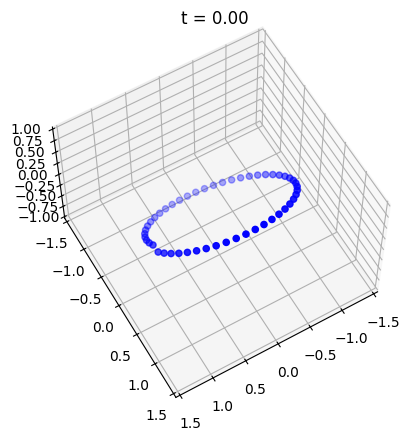

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Nombre de sites
n = 50

# Abscisses et ordonnées des sites
x = np.cos(2 * np.pi * np.arange(1, n+1) / n)
y = np.sin(2 * np.pi * np.arange(1, n+1) / n)

# Supposons que y représente les valeurs de concentration à différents moments
# Pour simplifier, nous simulons des données pour `y` en utilisant une animation simple
t = np.linspace(0, 2*np.pi, 100)  # Temps
ye = np.array([np.sin(2 * np.pi * t + phase) for phase in np.linspace(0, 2*np.pi, n)]).T

# Création de la figure 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Animation
for i in range(len(t)):
    ax.clear()
    ax.scatter(x, y, ye[i, :], c='b', marker='o')  # Dessine le i-ème point en 3D
    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1.5, 1.5])
    ax.set_zlim([-1, 1])
    ax.view_init(60, 60)
    ax.grid(True)
    ax.set_title(f't = {t[i]:.2f}')
    plt.pause(0.005)

plt.show()


*Note:* Ce script Python utilise matplotlib pour la visualisation 3D. Il simule une distribution de concentration autour d&#8217;un cercle à différents instants. Les points sont animés pour montrer comment la concentration évolue dans le temps sur le cercle. `view_init` permet de régler l&#8217;angle de vue de la scène 3D, et `pause` est utilisé pour ralentir l&#8217;animation afin que vous puissiez voir les changements.


In [ ]:
# votre code


## Problèmes aux valeurs propres

## Questions

* **Question a**\
En utilisant les disques de Gershgorin, donner une estimation du nombre maximal de valeurs propres complexes des matrices suivantes

$$
\mathrm{A}=\left[\begin{array}{cccc}
2 & -\frac{1}{2} & 0 & -\frac{1}{2} \\
0 & 4 & 0 & 2 \\
-\frac{1}{2} & 0 & 6 & \frac{1}{2} \\
0 & 0 & 1 & 9
\end{array}\right], \mathrm{B}=\left[\begin{array}{cccc}
-5 & 0 & \frac{1}{2} & \frac{1}{2} \\
\frac{1}{2} & 2 & \frac{1}{2} & 0 \\
0 & 1 & 0 & \frac{1}{2} \\
0 & \frac{1}{4} & \frac{1}{2} & 3
\end{array}\right]
$$


In [ ]:
# votre code


* **Question b**\
Utiliser le résultat de la [Proposition concernant les cercles de Gershgorin](ROOT:chap9/3-puissance-generalisee.ipynb#prop:gershgorin) pour trouver un décalage permettant le calcul de la valeur propre de module maximale de

$$
A=\left[\begin{array}{cccc}
5 & 0 & 1 & -1 \\
0 & 2 & 0 & -\frac{1}{2} \\
0 & 1 & -1 & 1 \\
-1 & -1 & 0 & 0
\end{array}\right]
$$
Comparer alors le nombre d&#8217;itérations et le coût de calcul de la méthode de la puissance avec et sans décalage en fixant la tolérance à $10^{-14}$.


In [ ]:
# votre code


* **Question c**\
Avec la commande `eig`, calculer toutes le valeurs propres des deux matrices . Vérifier alors la précision des conclusions qu&#8217;on peut tirer de la [Proposition concernant les cercles de Gershgorin](ROOT:chap9/3-puissance-generalisee.ipynb#prop:gershgorin).


In [ ]:
# votre code
